<a href="https://colab.research.google.com/github/sam445uutg/connet-four/blob/main/weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow.keras
!pip install seaborn  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
#from trnsorflow.keras.layers.models import Model

In [ ]:
data_sets = pd.read_csv("/content/drive/MyDrive/food_coded.csv")
data_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           121 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  123 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [ ]:
unqiue_list=[]
for col_name in data_sets:
  if data_sets[col_name].dtype == 'object':
    unqiue_list.append(col_name)
unqiue_list

['comfort_food',
 'comfort_food_reasons',
 'diet_current',
 'eating_changes',
 'father_profession',
 'fav_cuisine',
 'food_childhood',
 'healthy_meal',
 'ideal_diet',
 'meals_dinner_friend',
 'mother_profession',
 'type_sports']

In [ ]:
datasets = data_sets.drop(unqiue_list, axis='columns')
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           121 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food_reasons_coded    106 non-null    float64
 8   cook                          122 non-null    float64
 9   comfort_food_reasons_coded.1  125 non-null    int64  
 10  cuisine                       108 non-null    float64
 11  diet_current_coded            125 non-null    int64  
 12  drink                         123 non-null    float64
 13  eatin

In [ ]:
datasets.isnull().sum().sort_values(ascending= False)

calories_day                    19
comfort_food_reasons_coded      19
cuisine                         17
exercise                        13
employment                       9
GPA                              4
cook                             3
mother_education                 3
weight                           3
sports                           2
drink                            2
fav_food                         2
father_education                 1
income                           1
on_off_campus                    1
persian_food                     1
self_perception_weight           1
soup                             1
marital_status                   1
life_rewarding                   1
tortilla_calories                1
calories_scone                   1
thai_food                        0
turkey_calories                  0
veggies_day                      0
pay_meal_out                     0
parents_cook                     0
vitamins                         0
waffle_calories     

In [ ]:
datasets= datasets.dropna()
datasets.isnull().sum()

GPA                             0
Gender                          0
breakfast                       0
calories_chicken                0
calories_day                    0
calories_scone                  0
coffee                          0
comfort_food_reasons_coded      0
cook                            0
comfort_food_reasons_coded.1    0
cuisine                         0
diet_current_coded              0
drink                           0
eating_changes_coded            0
eating_changes_coded1           0
eating_out                      0
employment                      0
ethnic_food                     0
exercise                        0
father_education                0
fav_cuisine_coded               0
fav_food                        0
fries                           0
fruit_day                       0
grade_level                     0
greek_food                      0
healthy_feeling                 0
ideal_diet_coded                0
income                          0
indian_food   

In [ ]:
 #train test(generalizzation) 
train_data = datasets.sample(frac=0.8,random_state=0)
test_data= datasets.drop(train_data.index)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 58 to 10
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           46 non-null     float64
 1   Gender                        46 non-null     int64  
 2   breakfast                     46 non-null     int64  
 3   calories_chicken              46 non-null     int64  
 4   calories_day                  46 non-null     float64
 5   calories_scone                46 non-null     float64
 6   coffee                        46 non-null     int64  
 7   comfort_food_reasons_coded    46 non-null     float64
 8   cook                          46 non-null     float64
 9   comfort_food_reasons_coded.1  46 non-null     int64  
 10  cuisine                       46 non-null     float64
 11  diet_current_coded            46 non-null     int64  
 12  drink                         46 non-null     float64
 13  eating

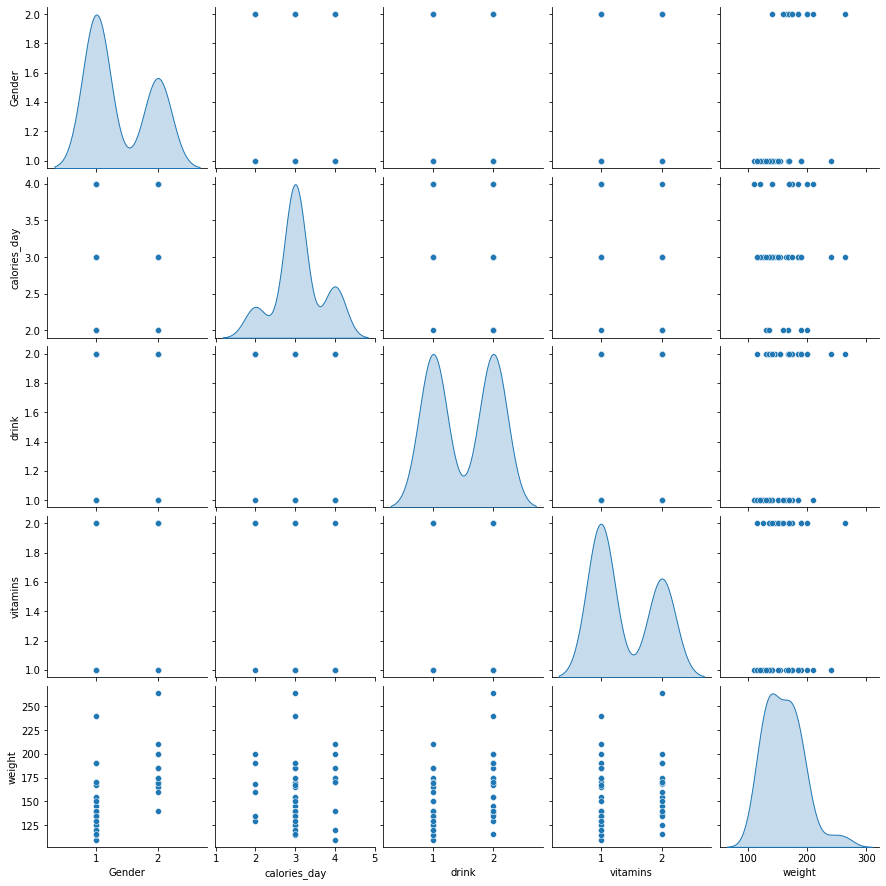

In [ ]:
import seaborn as sns
sns.pairplot(train_data[["Gender","calories_day", "drink","vitamins","weight",]], diag_kind='kde')

In [ ]:
train_stat = train_data.describe()
train_stat.pop("weight")
train_stat = train_stat.transpose()
train_stat

,count,mean,std,min,25%,50%,75%,max
GPA,46.0,3.436826,0.345451,2.6,3.20,3.5,3.7,4.0
Gender,46.0,1.369565,0.488021,1.0,1.00,1.0,2.0,2.0
breakfast,46.0,1.108696,0.314696,1.0,1.00,1.0,1.0,2.0
calories_chicken,46.0,597.173913,121.021817,265.0,610.00,610.0,720.0,720.0
calories_day,46.0,3.086957,0.589768,2.0,3.00,3.0,3.0,4.0
calories_scone,46.0,542.500000,250.086096,315.0,420.00,420.0,420.0,980.0
coffee,46.0,1.760870,0.431266,1.0,2.00,2.0,2.0,2.0
comfort_food_reasons_coded,46.0,2.521739,1.894309,1.0,1.00,2.0,3.0,9.0
cook,46.0,2.695652,1.112945,1.0,2.00,3.0,3.0,5.0
comfort_food_reasons_coded.1,46.0,2.456522,1.747462,1.0,1.00,2.0,3.0,9.0


In [ ]:
train_labels=train_data.pop('weight')
test_labels= test_data.pop('weight')

In [ ]:
#normalize 
def norm(x):
  return(x- train_stat['mean'])/train_stat['std']
normed_train_data= norm(train_data)
normed_test_data= norm(test_data)

In [ ]:
model= tf.keras.Sequential([
                             tf.keras.layers.Dense(392,activation="relu", input_shape=[len(train_data.keys())]),
                             tf.keras.layers.Dense(196, activation="softmax"),
                            tf.keras.layers.Dense(48, activation='sigmoid'),
                             tf.keras.layers.Dense(1)
 ])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 392)               19208     
                                                                 
 dense_28 (Dense)            (None, 196)               77028     
                                                                 
 dense_29 (Dense)            (None, 48)                9456      
                                                                 
 dense_30 (Dense)            (None, 1)                 49        
                                                                 
Total params: 105,741
Trainable params: 105,741
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse',
              optimizer='RMSprop',
              metrics=['mae', 'mse'])

In [ ]:
ex= normed_train_data[:10]
ex_result= model.predict(ex)
np.argmin(ex_result)

8

In [ ]:
import keras
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if(epoch%100==0):print(' ')
    print('-', end="")
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history= model.fit(normed_train_data, train_labels,
                   epochs=1000,
                   validation_split=0.2,
                   verbose=0,
                   callbacks=[PrintDot(), early_stop])

 
---------------------------------------------------------------------------------------------------- 
---------------------------------------------------------------------------------------------------- 
---------------------------------------------------------------------------------------------------- 
---------------------------------------------------------------------------------------------------- 
---------------------------------------------------------------------------------------------------- 
---------------------------------------------------------------------------------------------------- 
---------------------------------------------------------------------------------------------------- 
---------------------------------------------------------------------------------------------------- 
---------------------------------------------------------------------------------------------------- 
--------------------------------------------------------------------------------

In [ ]:
hist =pd.DataFrame(history.history)
hist.tail(20)

,loss,mae,mse,val_loss,val_mae,val_mse
980,6096.781250,71.657745,6096.781250,4364.076660,56.528831,4364.076660
981,6079.013672,71.531746,6079.013672,4351.892578,56.420967,4351.892578
982,6063.803711,71.423729,6063.803711,4341.133789,56.325539,4341.133789
983,6050.010742,71.328354,6050.010742,4329.191406,56.219429,4329.191406
984,6035.134277,71.222046,6035.134277,4318.895020,56.127777,4318.895020
985,6022.211426,71.130157,6022.211426,4309.282227,56.042076,4309.282227
986,6010.043945,71.044281,6010.043945,4299.622070,55.955818,4299.622070
987,5997.747559,70.957901,5997.747559,4289.515625,55.865440,4289.515625
988,5984.509766,70.867760,5984.509766,4276.645508,55.750130,4276.645508
989,5968.409668,70.752396,5968.409668,4265.382324,55.649025,4265.382324


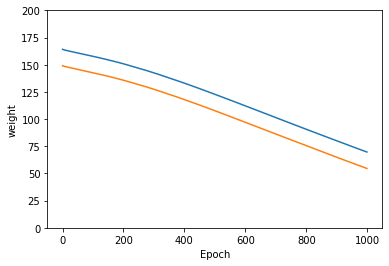

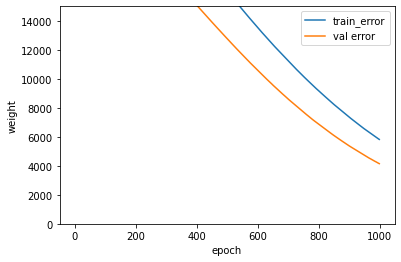

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('weight')
  plt.plot(hist['epoch'], hist['mae'], label='train_error')
  plt.plot(hist['epoch'], hist['val_mae'],label='val Error')
  #plt.legend()
  plt.ylim([0,200])
  plt.figure()
  plt.xlabel('epoch')
  plt.ylabel('weight')
  plt.plot(hist['epoch'], hist['mse'], label='train_error')
  plt.plot(hist['epoch'], hist['val_mse'], label='val error')
  plt.legend()
  plt.ylim([0,15000])
plot_history(history)

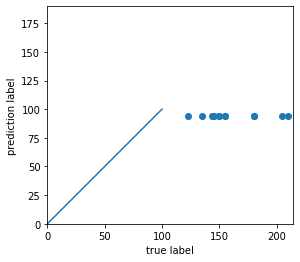

In [ ]:
test_pre =model.predict(normed_test_data)
plt.scatter(test_labels, test_pre)
plt.xlabel('true label')
plt.ylabel('prediction label')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ =plt.plot([-100,100], [-100,100])

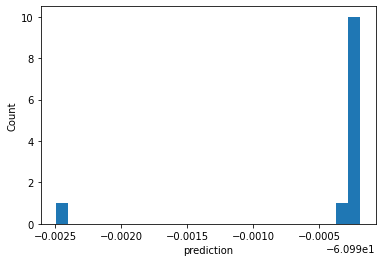

In [ ]:
error= test_pre - test_labels[1]
plt.hist(error, bins=25 )
plt.xlabel("prediction")
_ =plt.ylabel("Count")